**About Data**

This Database show the Stock of NVIDIA around 2023 to 2024

***Nvidia Stock Market Data Column Descriptions***
This dataset contains historical stock market data, with each row representing a trading day. The dataset includes the following columns:

*Date*:The specific date of the trading day (YYYY-MM-DD format).

*Open*:The stock's price at the start of the trading day.

*High*:The highest price the stock reached during the trading day.

*Low*:The lowest price the stock reached during the trading day.

*Close*:The stock's price at the end of the trading day.

*Adj Close (Adjusted Close)*:The closing price after adjustments for corporate actions such as dividends, stock splits, etc. It provides a more accurate reflection of the stock's value over time.

*Volume*:The total number of shares traded during the trading day.

**Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\nvidia_stock_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,14.851,14.996,14.096,14.315,14.305580,401277000
1,2023-01-04,14.567,14.853,14.241,14.749,14.739294,431324000
2,2023-01-05,14.491,14.564,14.148,14.265,14.255614,389168000
3,2023-01-06,14.474,15.010,14.034,14.859,14.849222,405044000
4,2023-01-09,15.284,16.056,15.141,15.628,15.617717,504231000


In [3]:
df.shape

(437, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,437.000000,437.000000,437.000000,437.000000,437.000000,4.370000e+02
mean,62.618792,63.795366,61.340346,62.635151,62.621695,4.554760e+08
std,34.893995,35.606990,33.951698,34.782847,34.783928,1.582334e+08
min,14.474000,14.564000,14.034000,14.265000,14.255614,1.739110e+08
25%,40.097000,40.500000,39.057999,39.770000,39.750576,3.610260e+08
50%,47.500000,48.230000,46.742001,47.506001,47.495808,4.277170e+08
75%,90.000000,91.300003,88.400002,90.356003,90.340851,5.136480e+08
max,139.800003,140.759995,132.419998,135.580002,135.568405,1.543911e+09


**Data Cleaning**

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Data Visualization**

Moving Average

In [7]:
data = df.copy()
data['Date'] = pd.to_datetime(data['Date'])

#Setting date as index
data.set_index('Date', inplace=True)

data['Moving_avg'] = data['Close'].rolling(window=25).mean()

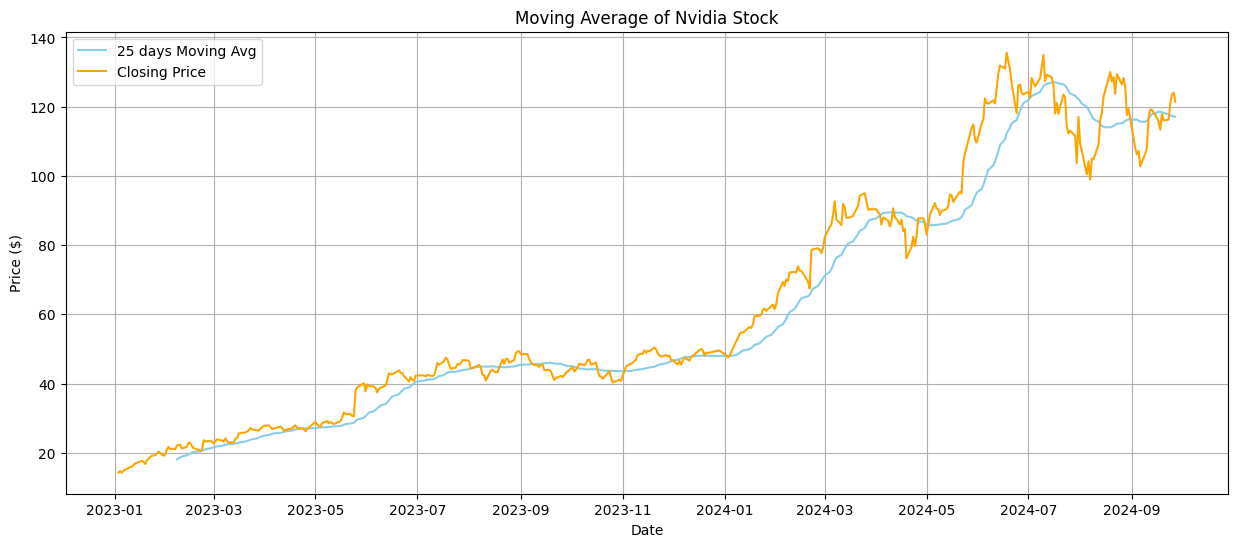

In [8]:
plt.figure(figsize = (15, 6))

plt.plot(data['Moving_avg'], label='25 days Moving Avg', color = 'skyblue')
plt.plot(data['Close'], label = 'Closing Price', color = 'orange')

plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.title('Moving Average of Nvidia Stock')
plt.legend()
plt.grid()
plt.show()

Closing Price and Volume Traded

In [9]:
data = df.copy()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace = True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,14.851,14.996,14.096,14.315,14.305580,401277000
2023-01-04,14.567,14.853,14.241,14.749,14.739294,431324000
2023-01-05,14.491,14.564,14.148,14.265,14.255614,389168000
2023-01-06,14.474,15.010,14.034,14.859,14.849222,405044000
2023-01-09,15.284,16.056,15.141,15.628,15.617717,504231000


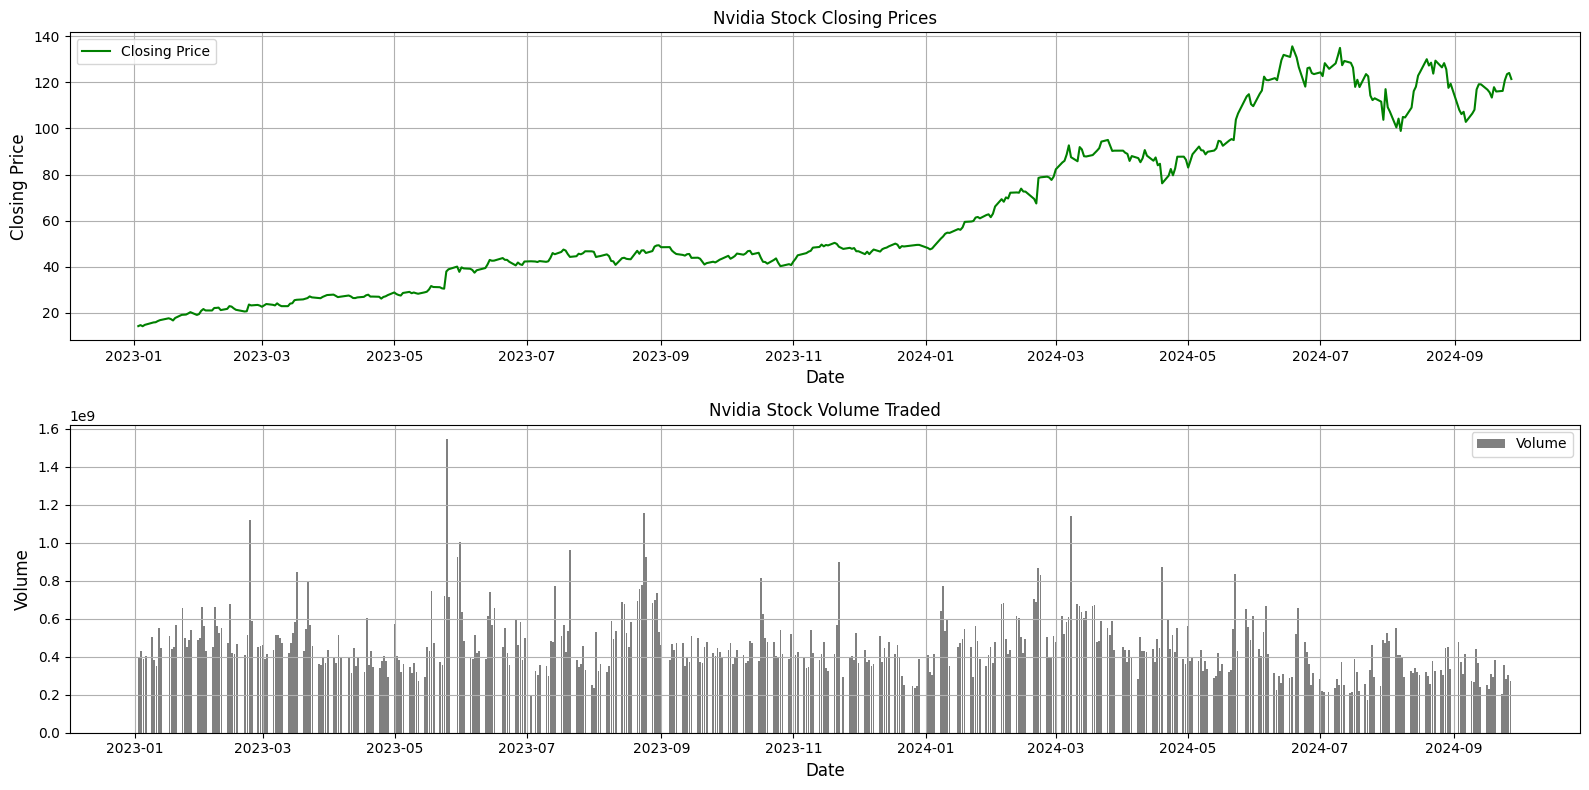

In [10]:
plt.figure(figsize=(16, 8))

#Plotting closing price 
plt.subplot(2, 1, 1)
plt.plot(data['Close'] , color='g', label='Closing Price')

plt.title('Nvidia Stock Closing Prices', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.xlabel('Date', fontsize=12)

plt.legend()
plt.grid()

#Plot of Volume traded
plt.subplot(2, 1, 2)
plt.bar(data.index, data['Volume'], color='grey', label = 'Volume')
plt.title('Nvidia Stock Volume Traded', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid()
plt.legend()

#adjust layout
plt.tight_layout()

#Display the graph
plt.show()

Price Difference (High - Low)

In [11]:
data = df.copy()
data['Difference'] = data['High']-data['Low']
data['Per_Change'] = data['Difference']/data['Open']
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Difference,Per_Change
0,2023-01-03,14.851,14.996,14.096,14.315,14.305580,401277000,0.900001,0.060602
1,2023-01-04,14.567,14.853,14.241,14.749,14.739294,431324000,0.612000,0.042013
2,2023-01-05,14.491,14.564,14.148,14.265,14.255614,389168000,0.416000,0.028707
3,2023-01-06,14.474,15.010,14.034,14.859,14.849222,405044000,0.976000,0.067431
4,2023-01-09,15.284,16.056,15.141,15.628,15.617717,504231000,0.915000,0.059867


In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace = True)

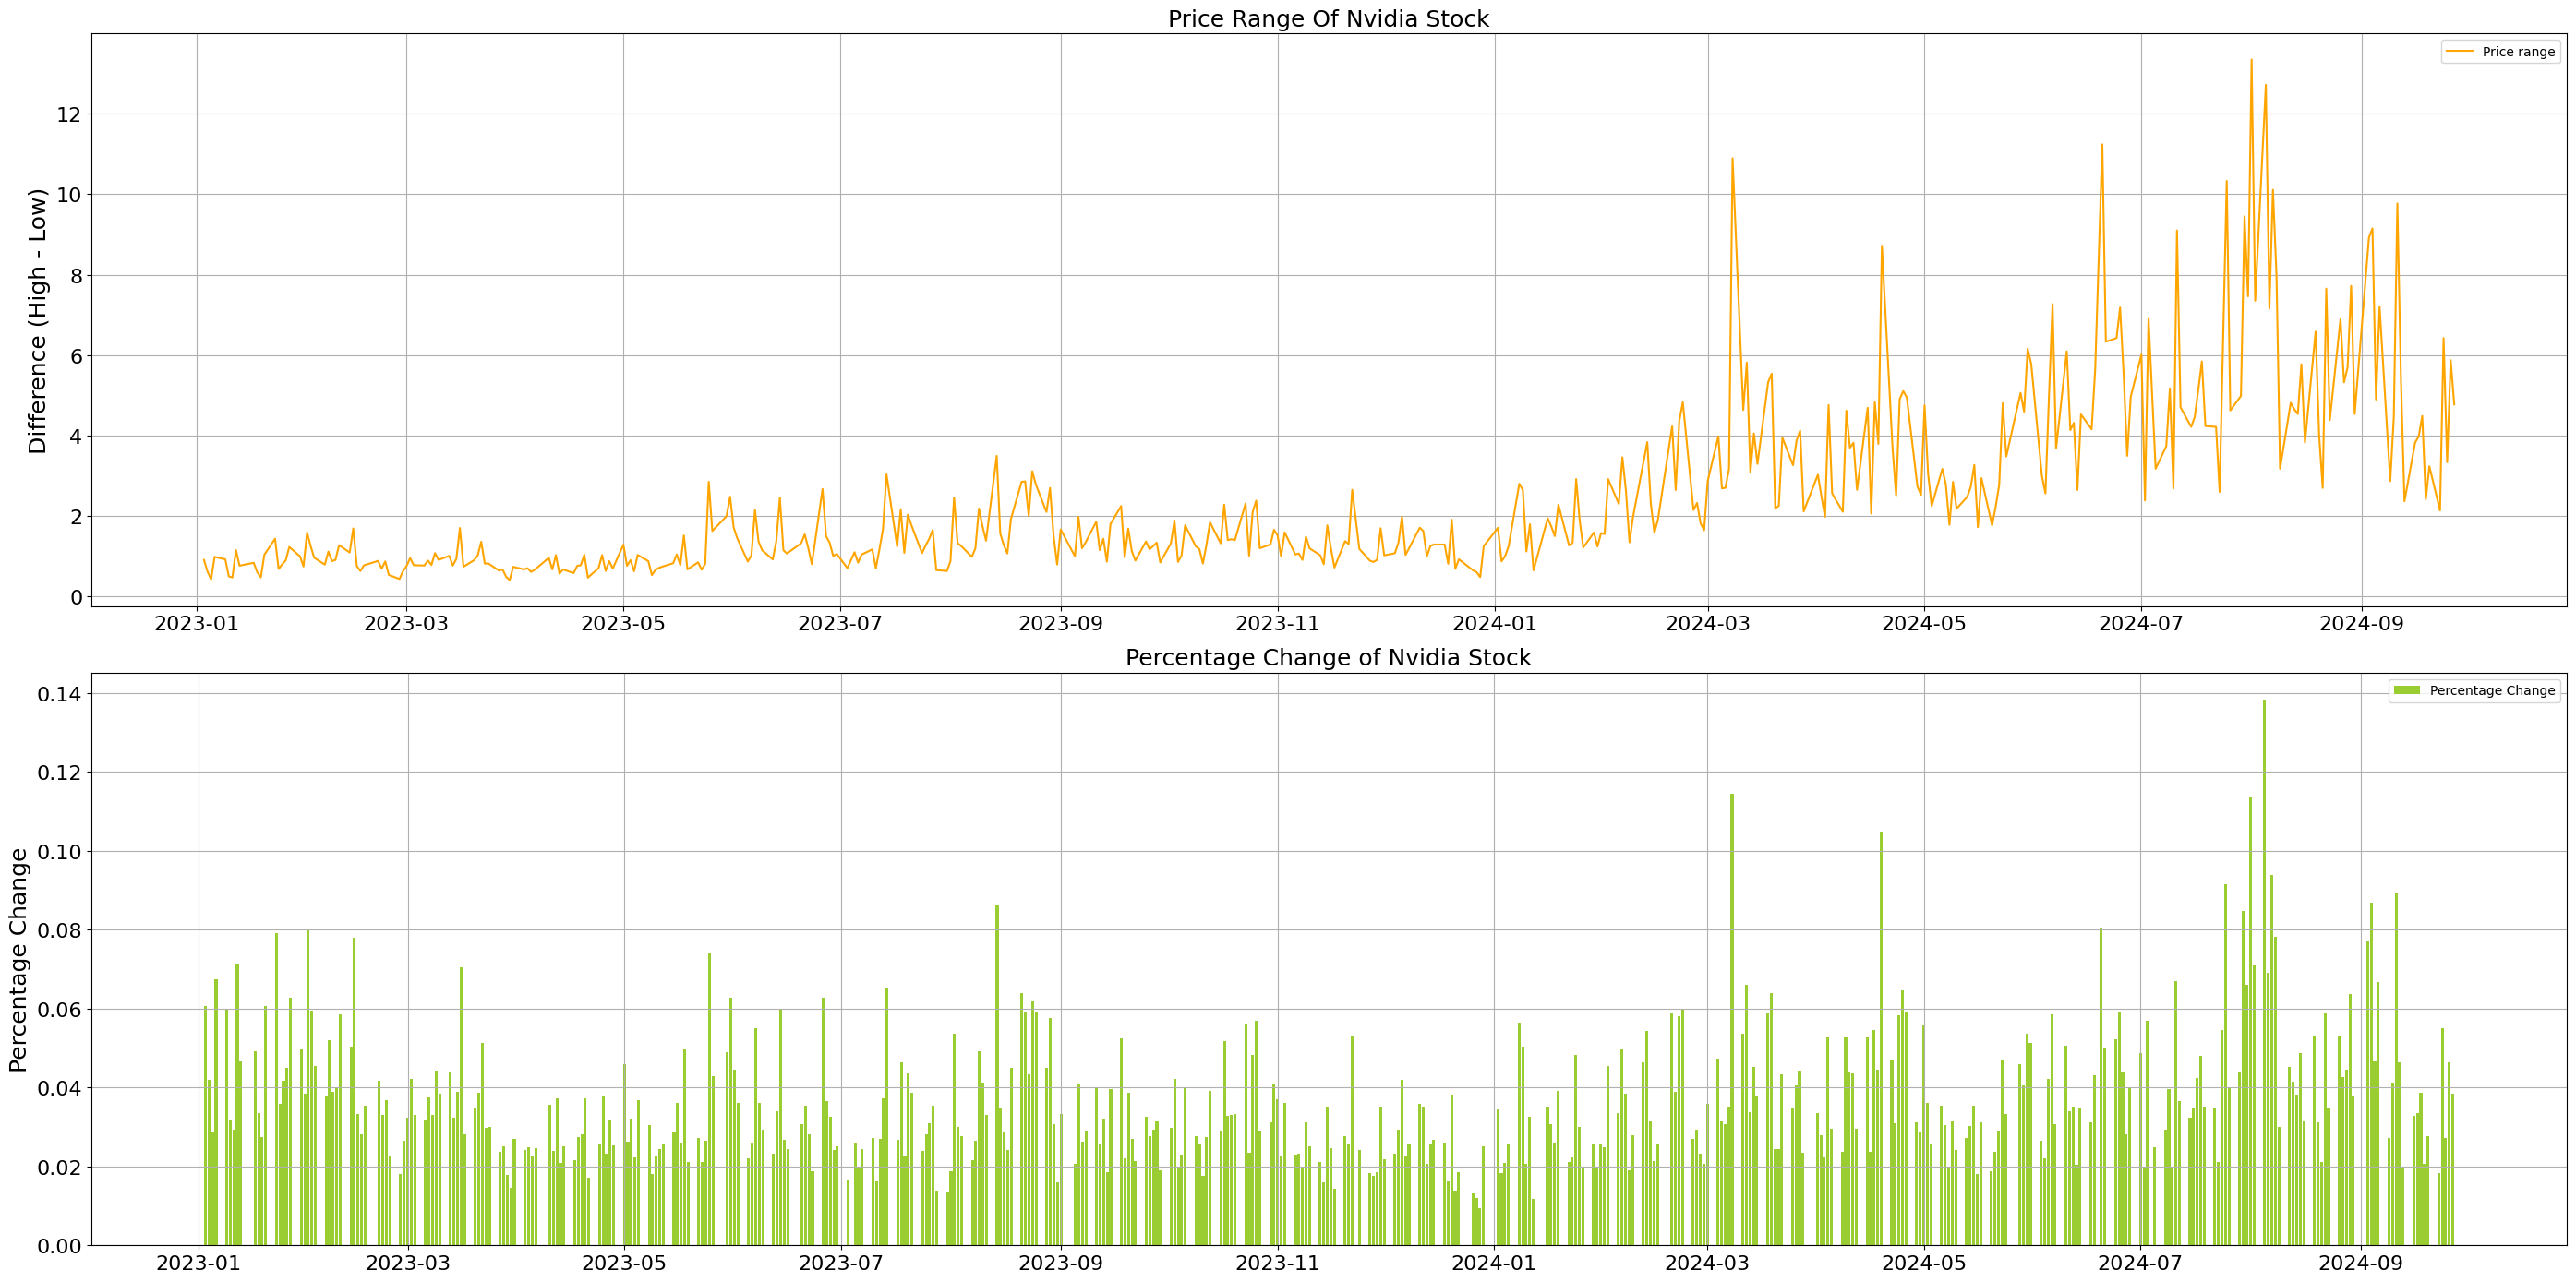

In [13]:
plt.figure(figsize = (28, 14))

#Price Range (High-Low) Line Chart:
plt.subplot(2,1,1)

plt.plot(data['Difference'], color='orange', label = 'Price range')
plt.tick_params(axis = 'x', labelsize = 16)
plt.tick_params(axis = 'y', labelsize = 16)
plt.title('Price Range Of Nvidia Stock', fontsize=18)
plt.ylabel('Difference (High - Low)', fontsize=18)
plt.legend()
plt.grid()

# Percentage Change of Nvidia Stock
plt.subplot(2,1,2)
plt.bar(data.index, data['Per_Change'], color='yellowgreen', label = 'Percentage Change')
plt.tick_params(axis = 'x', labelsize = 16)
plt.tick_params(axis = 'y', labelsize = 16)
plt.title('Percentage Change of Nvidia Stock', fontsize=18)
plt.ylabel('Percentage Change', fontsize=18)
plt.legend()
plt.grid()

plt.tight_layout()

plt.show()

Histogram of Volume Traded

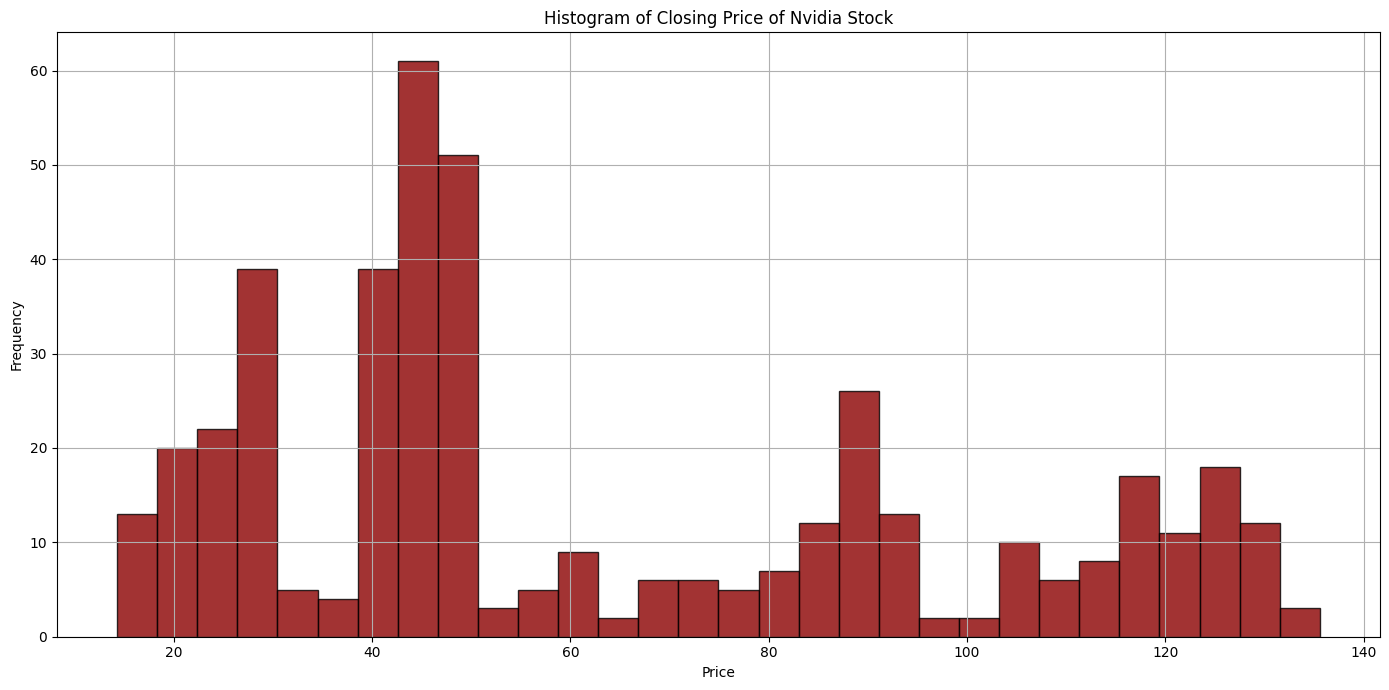

In [14]:
data = df.copy()

plt.figure(figsize=(14, 7))

#Histogram of Volume Traded
plt.hist(data['Close'],bins = 30, edgecolor='black', color='darkred', alpha=.8)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Histogram of Closing Price of Nvidia Stock')
plt.grid()

plt.tight_layout()
plt.show()